# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `7` | `Questions`

> Hi, Team. 👋

> The exercise questions ask you to solve three bigger questions. As with our previous exercise problem sets, while answering the questions you will be able to incorporate what you learned in class and consolidate your understanding.

> Enjoy!"🤞

### For standardization of your answers…

> Please execute the lines of code below before you start work on your answers.

In [1]:
import plotly.express as px

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf

(
    yf
    .pdr_override()
)

import warnings
warnings.filterwarnings("ignore")

> Let's set some print option.

In [3]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

## 👇 <font color = "purple"> Bigger Question 1. 

> Here's something that's familiar to you, with a few minor tweaks.

### Please create a predictive model for the weekly return of AMZN stock. You will use supervised learning for your predictive modelling.

> As you learned in class, to do this it is essential to know what factors are related to Amazon’s stock price, and to incorporate as much information as you can into the model.

> Among the three major factors (correlated assets, technical indicators, and fundamental analysis), you will use correlated assets and technical indicators as features here.

    Step 1. Use 75% of your data for the training of your algorithm, and 25% for the testing set.

    Step 2. For your feature engineering...
    
> Our operational definition of `outcome` (`Y`) is the weekly return of Amazon (AMZN). The number of trading days in a week is assumed to be five, and we compute the return using five trading days. 
<br>
    
* <font color = "green"> NOTE: The lagged five-day variables embed the time series component by using a time-delay approach, where the lagged variable is included as one of the predictor variables. This step translates the time series data into a supervised regression-based model framework.
<br>    
    
> For `input features` (`predictors`; `Xs`), we use (The variables used as predictors are as follows) ...

> `Correlated assets`

* lagged five-day returns of stocks (AAPL, MSFT, F);
* currency exchange rates (USD/JPY and GBP/USD);
* indices (S&P 500, Dow Jones, and VIX);
* lagged five-day, 15-day, 30-day, and 60-day returns of AMZN.

> `Technical indicators`

* 21-day, 63-day, and 252-day moving averages;
* 10-day, 30-day, and 200-day exponential moving averages.

    
    Step 3. For your algorithm of choices, please assess the model performance of the following algorithms: 

* Linear Regression
* Elastic Net
* LASSO
* Support Vector Machine
* K-Nearest Neighbor
* ARIMA
* Decision Tree
* Extra Trees 
* Random Forest
* Gradient Boosting Tree
* Adaptive Boosting
    
    
    Step 4. For this exercise, hyperparameter tuning won’t be requested. 
    
    Step 5. But make sure to compare the model performance of the above algorithms.

> The metric for assessing model performance will be mean squared error (`MSE`).
<br>

> Show which of the algorithms perform relatively better by a comparison visualization of performance, for both the training and testing sets learned in class. 

    Step 6. Using the model of your choice, please visualize the actual vs. predicted (estimated) data.

### Below are the lines of code that lead to an answer:

In [5]:
stock_ticker = ["AMZN", "AAPL", "MSFT", "F"]

currency_ticker = ["DEXJPUS", "DEXUSUK"]

index_ticker = ["SP500", "DJIA", "VIXCLS"]

start_date = dt.datetime(2000, 1, 1)
end_date = dt.datetime(2020, 12, 31)

stock_data = pdr.get_data_yahoo(stock_ticker, start = start_date, end = end_date)
currency_data = pdr.get_data_fred(currency_ticker, start = start_date, end = end_date)
index_data = pdr.get_data_fred(index_ticker, start = start_date, end = end_date)

[*********************100%%**********************]  4 of 4 completed


Output features

In [6]:
return_period = 5

In [7]:
Y =\
    (np
     .log(stock_data.loc[ : , ("Adj Close", "AMZN")]
         )
     .diff(return_period)
     .shift(-return_period)
    )

Y.tail(10) #相当于diff完之后把前面的na值移走

Date
2020-12-16   -0.017333
2020-12-17   -0.019783
2020-12-18    0.025384
2020-12-21    0.035487
2020-12-22    0.024439
2020-12-23         NaN
2020-12-24         NaN
2020-12-28         NaN
2020-12-29         NaN
2020-12-30         NaN
Name: (Adj Close, AMZN), dtype: float64

In [8]:
Y.name =\
    (Y
     .name[-1]
     +
     "_pred")

Y.tail(10)

Date
2020-12-16   -0.017333
2020-12-17   -0.019783
2020-12-18    0.025384
2020-12-21    0.035487
2020-12-22    0.024439
2020-12-23         NaN
2020-12-24         NaN
2020-12-28         NaN
2020-12-29         NaN
2020-12-30         NaN
Name: AMZN_pred, dtype: float64

Input feature

In [9]:
X1 =\
    (np.
     log(stock_data.loc[ : , ("Adj Close", ("AAPL", "MSFT", "F")
                             )
                       ]
        )
     .diff(return_period)
    )

X1.columns =\
    (X1
     .columns
     .droplevel()
    )

X1

,AAPL,MSFT,F
Date,,,
2000-01-03,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN
...,...,...,...
2020-12-23,0.024347,0.007904,-0.005546
2020-12-24,0.025090,0.015062,-0.024527
2020-12-28,0.076209,0.028725,-0.006726


In [10]:
currency_data.tail(30)

,DEXJPUS,DEXUSUK
DATE,,
2020-11-20,103.81,1.3294
2020-11-23,104.42,1.3300
2020-11-24,104.61,1.3350
2020-11-25,104.39,1.3378
2020-11-26,NaN,NaN
2020-11-27,NaN,NaN
2020-11-30,104.38,1.3338
2020-12-01,104.40,1.3392
2020-12-02,104.52,1.3348


In [11]:
X2 =\
    (np
     .log(currency_data).dropna()
     .diff(return_period)
    )

X2

,DEXJPUS,DEXUSUK
DATE,,
2000-01-03,NaN,NaN
2000-01-04,NaN,NaN
2000-01-05,NaN,NaN
2000-01-06,NaN,NaN
2000-01-07,NaN,NaN
...,...,...
2020-12-23,-0.000676,0.000518
2020-12-28,0.006861,-0.011975
2020-12-29,0.001450,0.001111


In [12]:
index_data

,SP500,DJIA,VIXCLS
DATE,,,
2000-01-03,NaN,NaN,24.21
2000-01-04,NaN,NaN,27.01
2000-01-05,NaN,NaN,26.41
2000-01-06,NaN,NaN,25.73
2000-01-07,NaN,NaN,21.72
...,...,...,...
2020-12-25,NaN,NaN,NaN
2020-12-28,3735.36,30403.97,21.70
2020-12-29,3727.04,30335.67,23.08


In [13]:
X3 =\
    (np
     .log(index_data)
     .diff(return_period)
    )

X3

,SP500,DJIA,VIXCLS
DATE,,,
2000-01-03,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN
...,...,...,...
2020-12-25,NaN,NaN,NaN
2020-12-28,0.010885,0.006187,-0.147943
2020-12-29,0.010731,0.010610,-0.048625


In [14]:
X4 =\
    (
    pd
    .concat([np
             .log(stock_data.loc[ : , ("Adj Close", "AMZN")
                                ]
                 )
             .diff(i) for i in [return_period, 
                                return_period * 3, 
                                return_period * 6, 
                                return_period * 12]
            ],
           axis = 1
           )
    .dropna()
)

X4.columns = ["AMZN_DT", "AMZN_3DT", "AMZN_6DT", "AMZN_12DT"]

In [15]:
X4

,AMZN_DT,AMZN_3DT,AMZN_6DT,AMZN_12DT
Date,,,,
2000-03-29,-0.064833,0.040429,-0.108093,-0.299406
2000-03-30,-0.017700,-0.034183,-0.061067,-0.208755
2000-03-31,-0.081477,0.001867,-0.029414,-0.040225
2000-04-03,-0.140147,-0.027160,-0.018510,-0.030980
2000-04-04,-0.092373,-0.026051,0.005882,-0.084320
...,...,...,...,...
2020-12-23,-0.017333,-0.005716,0.048319,0.012761
2020-12-24,-0.019783,-0.004415,0.011189,0.007581
2020-12-28,0.025384,0.037662,0.054337,0.019277


In [16]:
#moving average
X5 = (pd
    .concat([np
             .log(stock_data.loc[ : , ("Adj Close", "AMZN")
                                ]
                 )
             .rolling(window = i).mean() for i in [21, 63, 252]
            ],
           axis = 1
           )
    .dropna())

X5.columns = ["SMA_21", "SMA_63", "SMA_252"]

In [17]:
X5

,SMA_21,SMA_63,SMA_252
Date,,,
2000-12-29,0.034510,0.288550,0.774601
2001-01-02,0.007072,0.273472,0.767209
2001-01-03,-0.009023,0.262498,0.761097
2001-01-04,-0.034674,0.249122,0.755129
2001-01-05,-0.061117,0.235868,0.749158
...,...,...,...
2020-12-23,5.067563,5.069356,4.866054
2020-12-24,5.068390,5.069749,4.868154
2020-12-28,5.069846,5.070290,4.870389


In [18]:
# exponential moving average
X6 = (pd
    .concat([np
             .log(stock_data.loc[ : , ("Adj Close", "AMZN")
                                ]
                 )
             .ewm(span = i).mean() for i in [10, 30, 200]
            ],
           axis = 1
           )
    .dropna())



X6.columns = ["EWM_10", "EWM_30", "EWM_200"]

In [19]:
X6

,EWM_10,EWM_30,EWM_200
Date,,,
2000-01-03,1.497109,1.497109,1.497109
2000-01-04,1.449322,1.452219,1.453449
2000-01-05,1.368869,1.379980,1.384679
2000-01-06,1.309040,1.326882,1.334585
2000-01-07,1.291085,1.308592,1.316612
...,...,...,...
2020-12-23,5.071794,5.066929,4.946382
2020-12-24,5.070850,5.066908,4.947578
2020-12-28,5.076345,5.069112,4.949105


In [20]:
X=\
(
    pd
    .concat([X1, X2, X3, X4, X5, X6],
            axis = 1)
)

X

,AAPL,MSFT,F,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,AMZN_DT,AMZN_3DT,AMZN_6DT,AMZN_12DT,SMA_21,SMA_63,SMA_252,EWM_10,EWM_30,EWM_200
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.497109,1.497109,1.497109
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.449322,1.452219,1.453449
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.368869,1.379980,1.384679
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.309040,1.326882,1.334585
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.291085,1.308592,1.316612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-28,0.076209,0.028725,-0.006726,0.006861,-0.011975,0.010885,0.006187,-0.147943,0.025384,0.037662,0.054337,0.019277,5.069846,5.070290,4.870389,5.076345,5.069112,4.949105
2020-12-29,0.050486,0.006984,-0.012395,0.001450,0.001111,0.010731,0.010610,-0.048625,0.035487,0.050628,0.059914,0.061133,5.071697,5.071159,4.872719,5.082935,5.071917,4.950732
2020-12-30,0.013856,-0.010144,0.007932,-0.001258,0.018621,0.011326,0.009241,-0.023439,0.024439,0.033597,0.048254,0.026725,5.073435,5.071836,4.875003,5.086338,5.073835,4.952234


In [21]:
data =\
(
pd
.concat([Y, X],
        axis = 1)
.dropna()
.iloc[ : :return_period, :]
)

In [22]:
data

,AMZN_pred,AAPL,MSFT,F,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,AMZN_DT,AMZN_3DT,AMZN_6DT,AMZN_12DT,SMA_21,SMA_63,SMA_252,EWM_10,EWM_30,EWM_200
2013-11-04,-0.012228,-0.005924,0.010349,-0.027285,0.009373,-0.011284,0.003297,0.004498,-0.028965,0.001618,0.143770,0.141231,0.187991,2.802286,2.736979,2.623963,2.864461,2.804004,2.660925
2013-11-12,0.043144,-0.004586,0.019461,-0.021888,0.010390,-0.002134,0.002674,0.008445,-0.034499,-0.026427,0.049829,0.085304,0.202102,2.842069,2.753731,2.634036,2.865841,2.824953,2.672990
2013-11-19,0.044037,-0.000885,-0.009180,0.008931,0.004905,0.012115,0.011351,0.013643,0.043502,0.043144,0.006157,0.185241,0.243007,2.875875,2.773118,2.643622,2.890615,2.847383,2.684236
2013-11-26,0.011964,0.026308,0.016467,0.000000,0.012307,0.004768,0.008288,0.006602,-0.044282,0.044037,0.060754,0.218879,0.278036,2.895893,2.794141,2.652358,2.914777,2.869563,2.695940
2013-12-04,-0.009816,0.057555,0.041689,-0.014930,0.010792,0.010142,-0.008011,-0.012978,0.124438,0.011964,0.099144,0.148974,0.250752,2.913385,2.817855,2.661060,2.947016,2.897058,2.709153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-17,-0.005629,0.029064,0.016218,0.043206,-0.013157,0.008338,0.017890,0.012244,-0.088038,0.032622,-0.046932,0.011450,-0.053341,5.063361,5.076914,4.808381,5.057009,5.065415,4.912837
2020-11-24,0.027042,-0.035986,-0.000187,0.076961,0.003927,0.007745,0.007144,0.008788,-0.048262,-0.005629,0.022591,-0.099315,-0.101441,5.056543,5.071308,4.819770,5.050050,5.059888,4.919326
2020-12-04,-0.014703,0.047405,-0.004050,0.027131,-0.002206,0.007966,0.016565,0.010241,-0.002402,-0.010305,0.016675,-0.004360,-0.003954,5.061699,5.063526,4.835947,5.065837,5.064207,4.929622
2020-12-11,0.026981,0.001308,-0.005145,-0.034862,-0.002692,-0.021588,-0.009687,-0.005705,0.114410,-0.014703,-0.000193,-0.029901,0.035167,5.057429,5.062753,4.847493,5.056802,5.060977,4.935658


In [23]:
#上面就算是把输入变量处理完了，现在可以直接从data中提出X和Y
Y = data.loc[ : , Y.name]
X = data.loc[ : , X.columns]

<Axes: title={'center': 'Correlation Matrix'}>

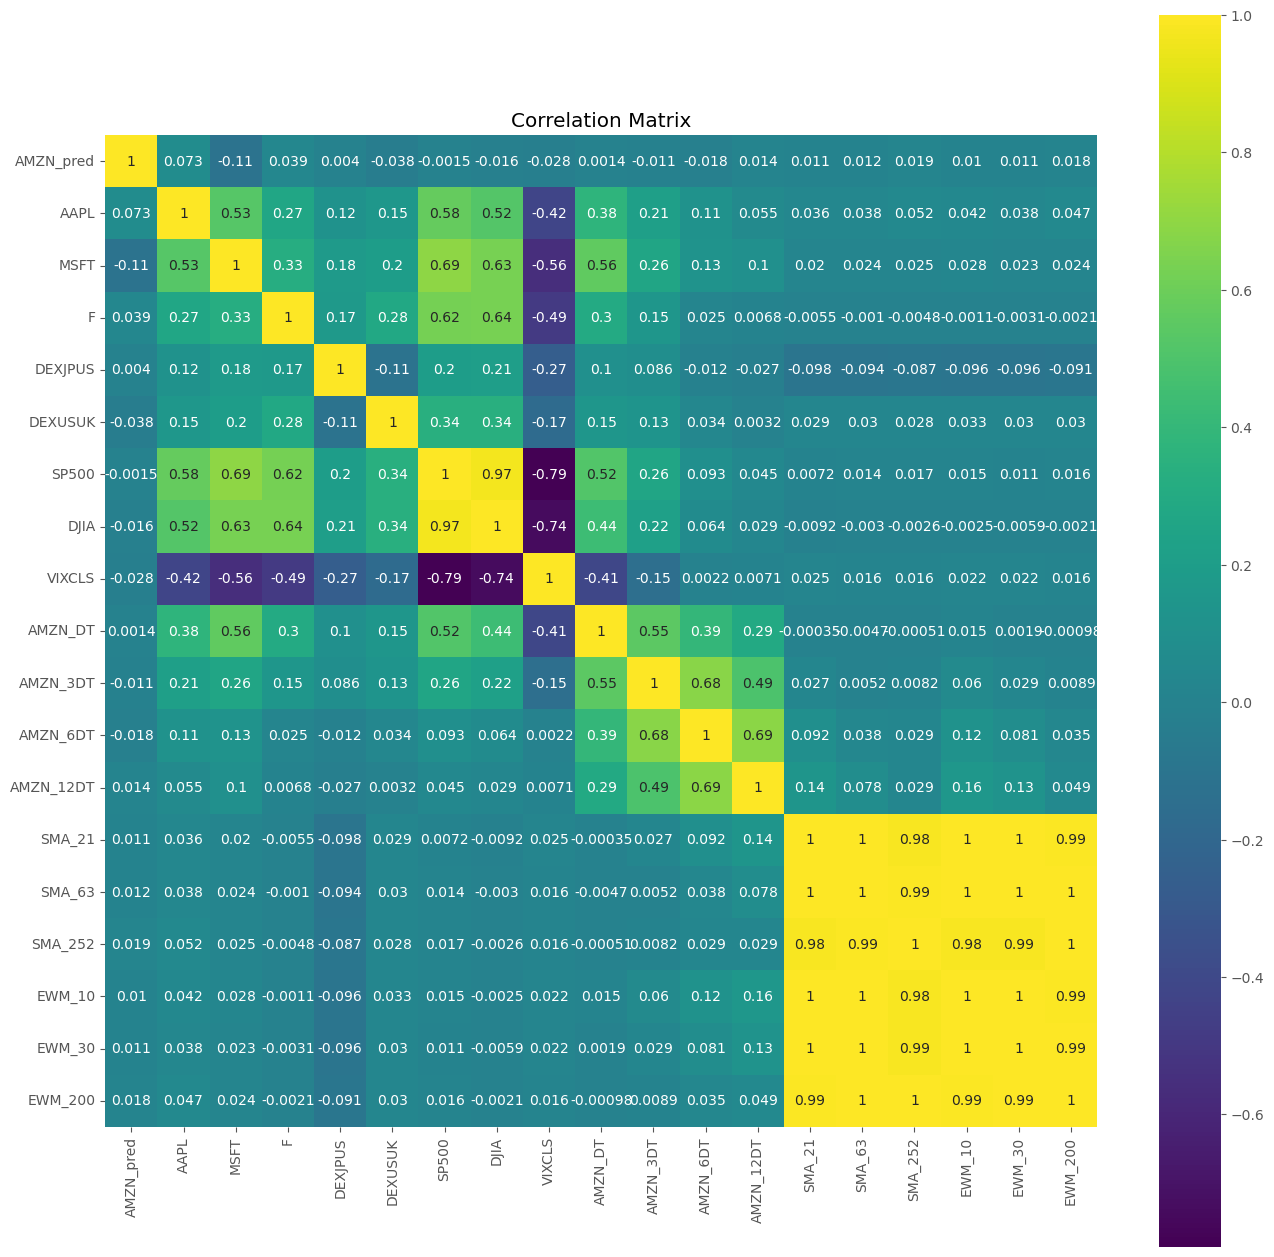

In [24]:
#相关系数
import seaborn as sns
correlation = data.corr()

plt.figure(figsize =[16, 16]
          )

plt.title("Correlation Matrix")

sns.heatmap(correlation,
            vmax = 1,
            square = True,
            cmap = "viridis",
            annot = True)

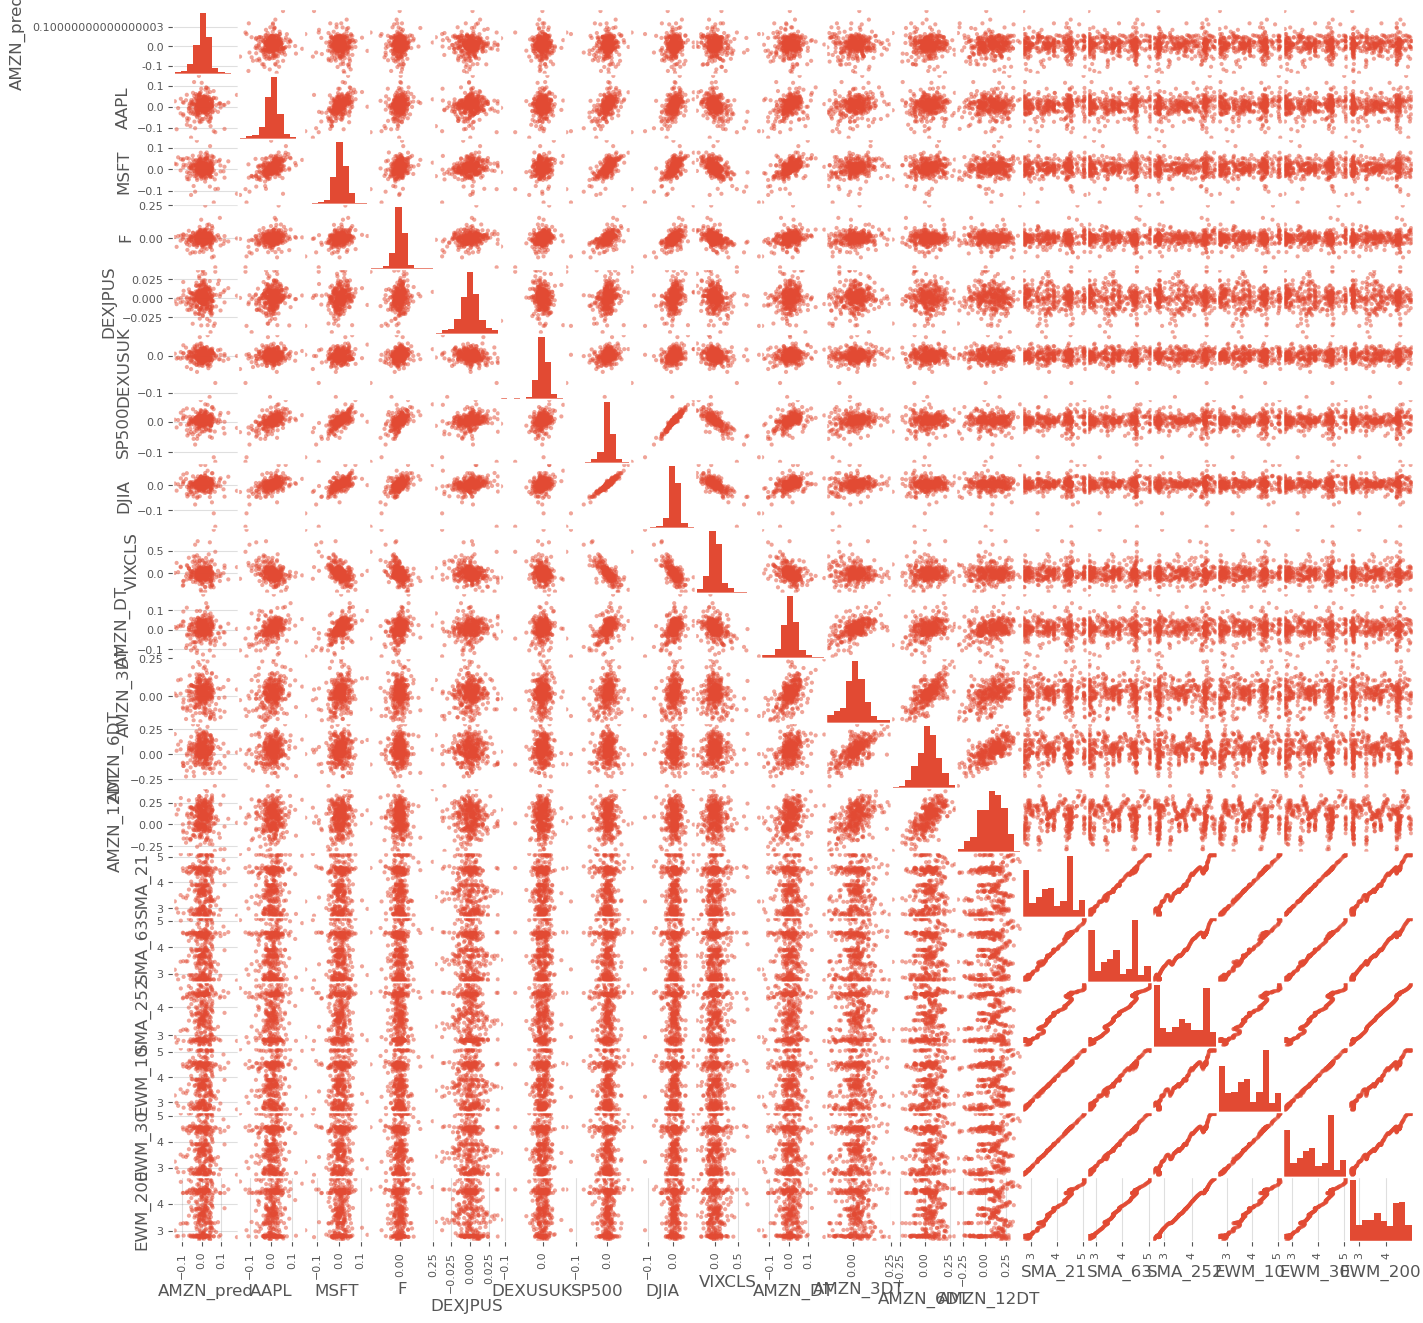

In [26]:
from pandas.plotting import scatter_matrix
scatter_matrix(data,
               figsize = (16, 16)
              )
plt.show()

In [27]:
#分离测试集和训练集
validation_size = 0.25

train_size =\
    int(len(X) 
        * 
        (1 - validation_size)
       )

X_train, X_test =\
    (X[0         :train_size], 
     X[train_size:len(X)    ]
    )

Y_train, Y_test =\
    (Y[0         :train_size], 
     Y[train_size:len(X)    ]
    )

Fitting

In [28]:
# Loading Algorithm

from sklearn.linear_model import LinearRegression

# Regularization
from sklearn.linear_model import Lasso 
from sklearn.linear_model import ElasticNet

# Decision Tree
from sklearn.tree import DecisionTreeRegressor

# ENSEMBLE

## Bagging————bootstrap aggregation
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

### light gbm
### cat boost

## Boosting
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Support Vector Machine
from sklearn.svm import SVR #SVC

# K-Nearest Neighbor
from sklearn.neighbors import KNeighborsRegressor

# Multi-layer Perceptron (Neural Networks)
from sklearn.neural_network import MLPRegressor

In [29]:
# for data split
from sklearn.model_selection import train_test_split

# for cross-validation ---- METHOD OF TUNE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# for assessment
from sklearn.metrics import mean_squared_error

# for Feature Selection
from sklearn.feature_selection import chi2, f_regression
from sklearn.feature_selection import SelectKBest

In [30]:
num_folds = 10
seed = 231018
scoring = "neg_mean_squared_error"

In [31]:
models = []

In [32]:
#linear regression
models.append(("LR", LinearRegression()
             )
            )
#Elastic net
models.append(("EN", ElasticNet()
             )
            )
#Lasso
models.append(("LASSO", Lasso()
             )
            )
#Support vector
models.append(("SVR", SVR()
             )
            )
#knn
models.append(("KNN", KNeighborsRegressor()
             )
            )
#Decision tree
models.append(("CART", DecisionTreeRegressor()
             )
            )
#Extra trees
models.append(("ETR", ExtraTreesRegressor()
              )
             )
#Random forest
models.append(("RFR", RandomForestRegressor()
              )
             )
#Gradient boosting tree
models.append(("GBR", GradientBoostingRegressor()
              )
             )
#Adaptive boosting
models.append(("ABR", AdaBoostRegressor()
              )
             )
#ARIMA要另外写

In [33]:
# Gift for you

# Team, let me guide you through this step-by-step

### Initialization of Lists:

names = []

kfold_results = []

train_results = []
test_results = [] #train比test表现好，overfitted

# Four empty lists are initialized. 
# names will store the names of the models, 
# kfold_results will store the cross-validation results, 
# train_results and test_results 
# will store the performance of the models 
# on the training and testing datasets, respectively.

### Looping through Models:

# Let's iterate over a list of models. 

# Each element in the models list is a tuple 
# containing the name of the model (name) and the model object (model).

for name, model in models:
    
### Appending Model Names:

# The name of the current model is appended to the names list.

    names.append(name)
    
### Let's run K-fold Cross-Validation
    
    kfold =\
        (KFold(n_splits = num_folds,
               random_state = seed,
               shuffle = True)
        )
    
# A KFold object is created with a specified number of splits (num_folds), 
# a random seed (seed), 
# and shuffling enabled.
    
### Running Cross-Validation:
# Let's convert MSE to positive (Here, now it becomes lower the better; See below)

    cv_results =\
        (
         -1
         *
         cross_val_score(model, X_train, Y_train,
                         cv = kfold,
                         scoring = scoring)
        )
        
# Cross-validation is performed on the training data (X_train, Y_train) using the current model. 
# The negative mean squared error is used 
# as the scoring metric 
# (hence multiplied by -1 to make it positive, 
# as the convention is that higher scores are better).

# Storing Cross-Validation Results:
 
### The cross-validation results for the current model are appended to the kfold_results list.    
    
    kfold_results.append(cv_results)

# Fitting the Model on the Entire Training Set:
  
    res = model.fit(X_train, Y_train) # The model is trained on the entire training dataset.

### Evaluating Model on Training Set:

# The trained model’s predictions on the training set are evaluated 
# using the mean squared error, and the result is appended to train_results.

    train_result = mean_squared_error(res.predict(X_train), Y_train)
    
    train_results.append(train_result)

## Evaluating Model on Testing Set:    
    
# Similarly, the model’s performance is evaluated 
# on the testing set and appended to test_results.
    
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    
    test_results.append(test_result)
    
# Printing the Results:

# The name of the model, 
# the average cross-validation score, 
# the standard deviation of the cross-validation scores, 
# the training set performance, 
# and the testing set performance are printed out.

    message = "%s: %f (%f) %f %f" % (name, cv_results.mean(), 
                                     cv_results.std(), 
                                     train_result, 
                                     test_result)
    print(message)

LR: 0.001802 (0.000948) 0.001463 0.001760
EN: 0.001667 (0.000955) 0.001649 0.001405
LASSO: 0.001667 (0.000955) 0.001649 0.001405
SVR: 0.002019 (0.001011) 0.001890 0.001421
KNN: 0.001986 (0.000927) 0.001300 0.002004
CART: 0.002717 (0.000936) 0.000000 0.009619
ETR: 0.001963 (0.001232) 0.000000 0.002206
RFR: 0.001813 (0.001050) 0.000262 0.003717
GBR: 0.001950 (0.000876) 0.000244 0.005815
ABR: 0.001844 (0.001056) 0.000882 0.001672


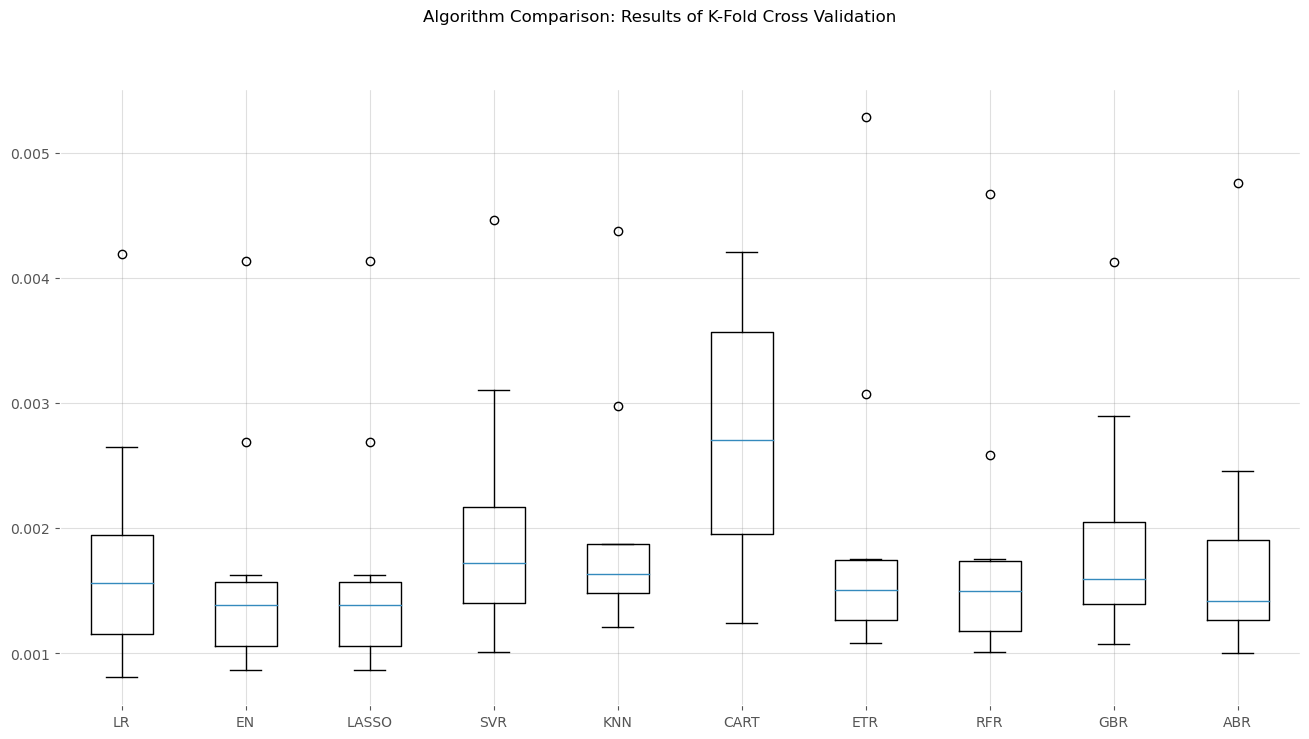

In [34]:
fig = plt.figure(figsize = [16, 8]
                )

fig.suptitle("Algorithm Comparison: Results of K-Fold Cross Validation")

ax = fig.add_subplot(111)

plt.boxplot(kfold_results)

ax.set_xticklabels(names)

plt.show()

In [68]:
data.columns

Index(['AMZN_pred', 'AAPL', 'MSFT', 'F', 'DEXJPUS', 'DEXUSUK', 'SP500', 'DJIA',
       'VIXCLS', 'AMZN_DT', 'AMZN_3DT', 'AMZN_6DT', 'AMZN_12DT', 'SMA_21',
       'SMA_63', 'SMA_252', 'EWM_10', 'EWM_30', 'EWM_200'],
      dtype='object')

In [69]:
#here is ARIMA
X_train_ARIMA =\
    (X_train
    .loc[ : , ['AAPL', 'MSFT', 'F', 'DEXJPUS', 'DEXUSUK', 'SP500', 'DJIA',
       'VIXCLS', 'AMZN_DT', 'AMZN_3DT', 'AMZN_6DT', 'AMZN_12DT', 'SMA_21',
       'SMA_63', 'SMA_252', 'EWM_10', 'EWM_30', 'EWM_200']]
   )

X_test_ARIMA =\
    (X_test
    .loc[ : , ['AAPL', 'MSFT', 'F', 'DEXJPUS', 'DEXUSUK', 'SP500', 'DJIA',
       'VIXCLS', 'AMZN_DT', 'AMZN_3DT', 'AMZN_6DT', 'AMZN_12DT', 'SMA_21',
       'SMA_63', 'SMA_252', 'EWM_10', 'EWM_30', 'EWM_200']]
)    

train_len = len(X_train_ARIMA)
test_len = len(X_test_ARIMA)
total_len = len(X)

In [35]:
import statsmodels.tsa.arima.model as stats
import statsmodels.api as sm

In [71]:
modelARIMA =\
(    stats
     .ARIMA(endog = Y_train,
                exog = X_train_ARIMA,
                order = [2, 0, 1]
            )
)

model_fit = modelARIMA.fit()

/Users/xiangsihan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/xiangsihan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/xiangsihan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/xiangsihan/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maxi

In [72]:
error_training_ARIMA =\
(    mean_squared_error(Y_train,
                       model_fit.fittedvalues)
)

predicted =\
(
    model_fit
    .predict(start = train_len - 1,
             end = total_len - 1,
             exog = X_test_ARIMA)[1: ]
)

/Users/xiangsihan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [73]:
error_testing_ARIMA =\
(    mean_squared_error(Y_test,
                        predicted)
)

error_testing_ARIMA

0.002191756736715851

In [74]:
test_results.append(error_testing_ARIMA)

train_results.append(error_training_ARIMA)

names.append("ARIMA")

Compare

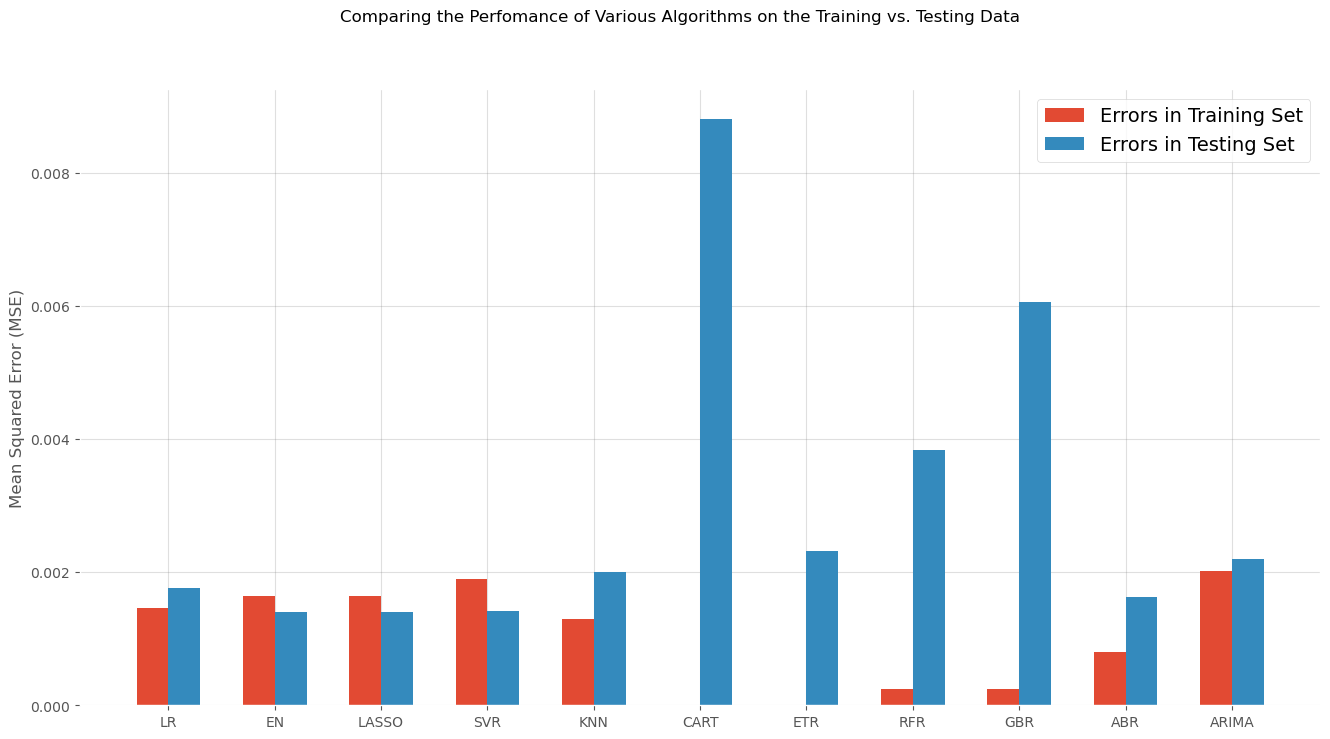

In [75]:
fig = plt.figure(figsize = [16, 8])

ind = np.arange(len(names)
               )

width = 0.30

fig.suptitle("Comparing the Perfomance of Various Algorithms on the Training vs. Testing Data")

ax = fig.add_subplot(111)

(plt
 .bar(ind - width/2,
    
      # Team, this line calculates the starting x position of the bars 
      # representing "Errors in Training Set". 
      # The width/2 term is used to shift the bars to the left, 
      # so they are centered around the tick mark for each group (algorithm) on the x-axis.
      
      # The bar chart will have two sets of bars for each algorithm: 
      # one for training errors and one for testing errors. 
      
      # By subtracting width/2 from ind, 
      # the training error bars are positioned to the left of the center of the tick marks. 
      
      train_results,
      width = width,
      label = "Errors in Training Set")
)

(plt
 .bar(ind + width/2,
      test_results,
      width = width,
      label = "Errors in Testing Set")
)

plt.legend()

ax.set_xticks(ind)
ax.set_xticklabels(names)

plt.ylabel("Mean Squared Error (MSE)")

plt.show()

### <font color = red> Answer 1 is presented in the cell below: </font>

In [76]:
res = model.fit(X_train, Y_train)

In [77]:
name = models[3][0]
model = models[3][1]

In [78]:
kfold =\
        (KFold(n_splits = num_folds,
               random_state = seed,
               shuffle = True)
        )
    

cv_results =\
        (
         -1
         *
         cross_val_score(model, X_train, Y_train,
                         cv = kfold,
                         scoring = scoring)
        )
        
kfold_results.append(cv_results)

res = model.fit(X_train, Y_train) 
train_result = mean_squared_error(res.predict(X_train), Y_train)
    
train_results.append(train_result)


test_result = mean_squared_error(res.predict(X_test), Y_test)

In [79]:
Y_test

2019-03-20   -0.017722
2019-03-27    0.030674
2019-04-03    0.014520
2019-04-10    0.009423
2019-04-17    0.019873
                ...   
2020-11-17   -0.005629
2020-11-24    0.027042
2020-12-04   -0.014703
2020-12-11    0.026981
2020-12-18    0.025384
Name: AMZN_pred, Length: 86, dtype: float64

In [80]:
predicted_SVR = pd.DataFrame(res.predict(X_test))

In [81]:
predicted_tune =  model_fit.predict(start = train_len - 1,
             end = total_len - 1,
             exog = X_test_ARIMA)[1:]

/Users/xiangsihan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


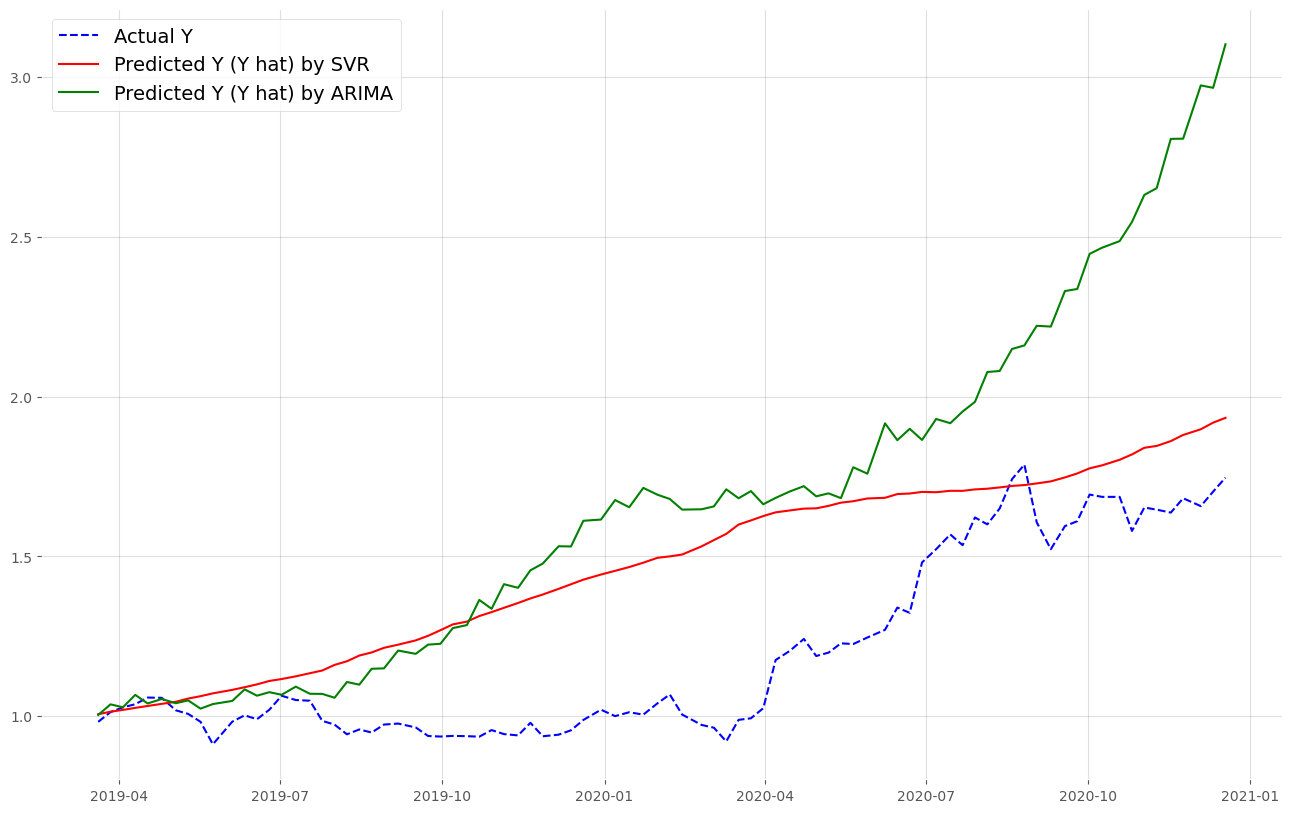

In [83]:
plt.figure(figsize = (16, 10)
           )

predicted_SVR.index = Y_test.index
predicted_tune.index = Y_test.index

plt.plot(np.exp(Y_test).cumprod(), "b--", label = "Actual Y")

plt.plot(np.exp(predicted_SVR).cumprod(), "r", label = "Predicted Y (Y hat) by SVR")
plt.plot(np.exp(predicted_tune).cumprod(), "g", label = "Predicted Y (Y hat) by ARIMA")
plt.legend()
plt.show()

## <font color = blue> 👉 Questions 2 to 5 ask you to build, execute, and backtest a mean-reversion strategy, using `Relative Strength Index` (`RSI`). </font>

#### The Relative Strength Index (RSI) is an indicator that uses the closing prices of an asset to identify oversold and overbought conditions. 

> Most commonly, RSI is calculated using a 14-day period, and measured on a scale from zero to 100. (It is an oscillator.)

> Traders usually buy an asset when it is oversold (when its RSI is below 30) and sell when it is overbought (when its RSI is above 70). 

> More extreme overbought and oversold levels, such as 80 and 20, are used less frequently, and imply stronger momentum.

#### You are asked to build a trading strategy with the following set of rules.

### <font color = green> NOTE: Apple (`AAPL`) as our security of interest. The `investment horizon` will be three years between 2015 and 2017; your `capital` is USD 100,000; and there is a USD 5 flat `commission fee` per trade.

- You can go long and short.
<br>

- To calculate RSI, use 14 periods (trading days).
<br>

- Enter a long position if RSI crosses the lower threshold (standard value of 30), moving upwards. Exit the position when RSI becomes higher than the middle level (value of 50).
<br>

- Enter a short position if RSI crosses the upper threshold (standard value of 70), moving downwards. Exit the position when RSI becomes less than 50.
<br>

- Only one position can be open at a time.

### <font color = green> NOTE: The RSI is defined as follows:
    
### Calculating the RSI first requires the RS which requires an average value of n-many previous trading days. 
<br>
    
- As discussed, a value of 14 days is common for the RSI calculation. 
<br>
    
- The first RS value requires the price from all 14 of the first trading days. Often, this is a source of confusion with the RSI given successive values only require the most recent. 
   
    
    Step 1. For 14 periods, calculate the difference in price from the current period and the previous period
    
    Step 2. For each period, record each positive change in price as a gain and each negative change as a loss
    
    Step 3. On the 14th period, calculate the arithmetic mean of the gains and losses for the entire 14 day period (e.g. gains / 14 & losses / 14)
    
    Step 4. Use these values to calculate the RS
    
### <center> $ RS = \frac{AverageGain}{AverageLoss} $
    
    Step 5. Use the RS value to calculate the RSI
    
    Step 6. For each proceeding period, use only the previous RSI value to calculate the next average value 
    by multiplying by our lookback period – 1 (e.g., 13 for a lookback of 14).
    
    Step 7. Add the value obtained in Step 6 to the current day’s value (run this for both the gains and losses)
    
### <center> $ RSI = 100 - \frac{100}{1 + RS} $

### Visualize your buy and sell positions.

### Below are the lines of code that lead to an answer:

In [32]:
stock_ticker = ["AAPL"]

start_date = dt.datetime(2015, 1, 1)
end_date = dt.datetime(2017, 12, 31)

apple = pdr.get_data_yahoo(stock_ticker, start = start_date, end = end_date)

[*********************100%%**********************]  1 of 1 completed


In [33]:
apple["Return"] = apple["Adj Close"].diff()
apple["up_sign"] = np.where(apple["Return"]>0,apple["Return"],0)
apple["down_sign"] = np.where(apple["Return"]<0,abs(apple["Return"]),0)
apple = apple.dropna()
apple = apple.reset_index(drop = False)

In [37]:
df = apple.iloc[0:14]
average_loss = df["down_sign"].mean()
average_gain = df["up_sign"].mean()
RS = average_gain/average_loss
RSI = 100-100/(1+RS)
apple.loc[13,"RSI"]=RSI
for i in range(14,len(apple)):
    average_loss = (average_loss*13+apple.loc[i,"down_sign"])/14
    average_gain = (average_gain*13+apple.loc[i,"up_sign"])/14
    if(i  == 14):
        print(average_loss)
    RS = average_gain/average_loss
    RSI = 100-100/(1+RS)
    apple.loc[i,"RSI"] = RSI
        

0.14966570601171375


In [39]:
apple[:15]

,Date,Open,High,Low,Close,Adj Close,Volume,Return,up_sign,down_sign,RSI
0,2015-01-05,27.072500,27.162500,26.352501,26.562500,23.808516,257142000,-0.690166,0.000000,0.690166,NaN
1,2015-01-06,26.635000,26.857500,26.157499,26.565001,23.810760,263188400,0.002245,0.002245,0.000000,NaN
2,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.144642,160423600,0.333881,0.333881,0.000000,NaN
3,2015-01-08,27.307501,28.037500,27.174999,27.972500,25.072323,237458000,0.927681,0.927681,0.000000,NaN
4,2015-01-09,28.167500,28.312500,27.552500,28.002501,25.099216,214798000,0.026894,0.026894,0.000000,NaN
5,2015-01-12,28.150000,28.157499,27.200001,27.312500,24.480753,198603200,-0.618464,0.000000,0.618464,NaN
6,2015-01-13,27.857500,28.200001,27.227501,27.555000,24.698118,268367600,0.217365,0.217365,0.000000,NaN
7,2015-01-14,27.260000,27.622499,27.125000,27.450001,24.604000,195826400,-0.094118,0.000000,0.094118,NaN
8,2015-01-15,27.500000,27.514999,26.665001,26.705000,23.936241,240056000,-0.667759,0.000000,0.667759,NaN
9,2015-01-16,26.757500,26.895000,26.299999,26.497499,23.750250,314053200,-0.185991,0.000000,0.185991,NaN


Enter a long position if RSI crosses the lower threshold (standard value of 30), moving upwards. Exit the position when RSI becomes higher than the middle level (value of 50).

Enter a short position if RSI crosses the upper threshold (standard value of 70), moving downwards. Exit the position when RSI becomes less than 50.

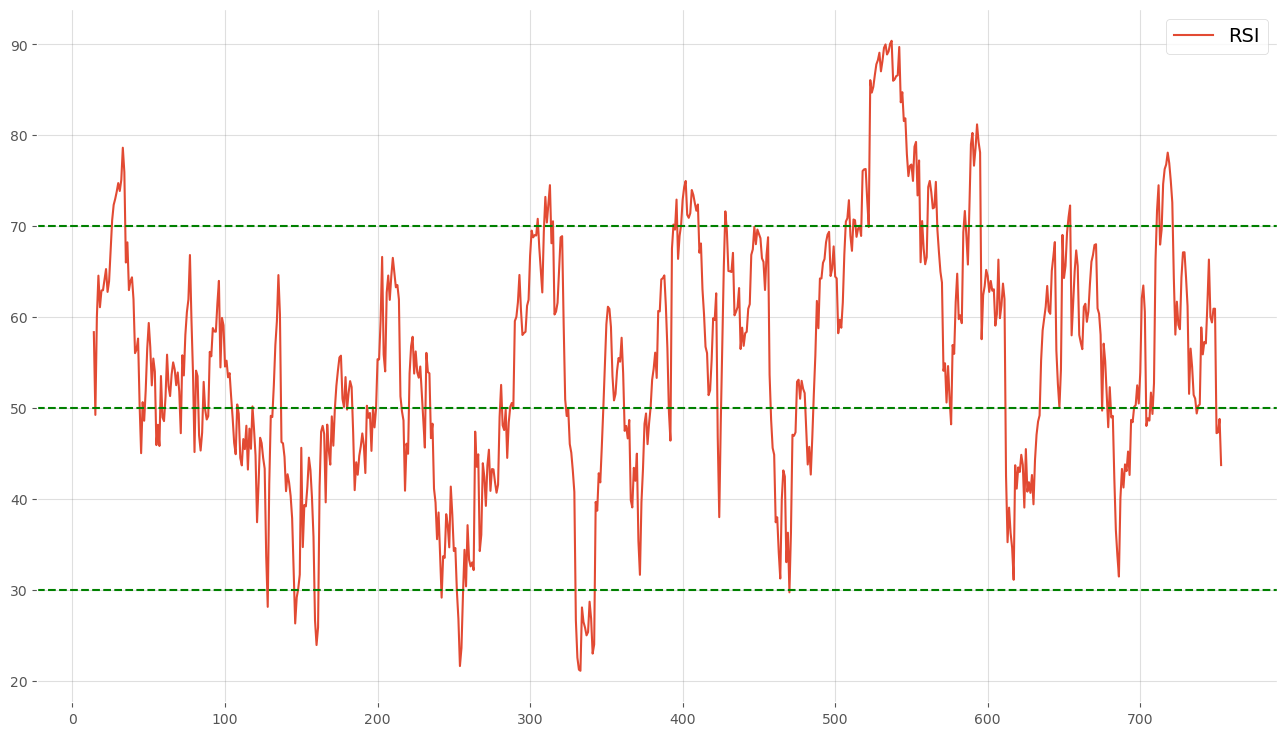

In [238]:
upper_threshold = 70
lower_threshold = 30
middle_line = 50

apple[["RSI"]].dropna().plot(figsize = [16, 9])

plt.axhline(upper_threshold, color = "green", ls = "--")

plt.axhline(middle_line, color = "green", ls = "--")

plt.axhline(lower_threshold, color = "green", ls = "--")

#当RSI向上穿过30之后，买入，当RSI继续向上穿过50之后，平仓
#当RSI向下穿过70之后，卖出，当RSI继续向下穿过50之后，平仓

In [239]:
apple1 = apple.dropna()

In [240]:
apple1["trading_positions"] =\
(
    np
    .where(((apple1["RSI"]>lower_threshold)&(apple1["RSI"].shift(1)<lower_threshold)), 
           1, np.nan)
)

apple1["trading_positions"] =\
(
    np
    .where(((apple1["RSI"]<upper_threshold)&(apple1["RSI"].shift(1)>upper_threshold)), 
           -1, apple1["trading_positions"])
)

apple1["trading_positions"] =\
(
    np
    .where(((apple1["RSI"]-middle_line)*(apple1["RSI"].shift(1)-middle_line)<0), 
           0, apple1["trading_positions"])
)

In [241]:
apple1["trading_positions"] = apple1["trading_positions"].ffill()


In [242]:
apple1 = apple1.fillna(0)

In [243]:
apple1

,Date,Open,High,Low,Close,Adj Close,Volume,Return,up_sign,down_sign,RSI,trading_positions
14,2015-01-26,28.434999,28.590000,28.200001,28.275000,25.343464,222460000,0.001062,0.001062,0.000000,58.343608,0.0
15,2015-01-27,28.105000,28.120001,27.257500,27.285000,24.456104,382274800,-0.035013,0.000000,0.035013,49.243365,0.0
16,2015-01-28,29.407499,29.530001,28.827499,28.827499,25.838680,585908400,0.056533,0.056533,0.000000,60.072320,0.0
17,2015-01-29,29.080000,29.797501,28.889999,29.725000,26.643131,337745600,0.031134,0.031134,0.000000,64.557045,0.0
18,2015-01-30,29.600000,30.000000,29.212500,29.290001,26.253229,334982000,-0.014634,0.000000,0.014634,61.083965,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
749,2017-12-22,43.669998,43.855000,43.625000,43.752499,41.427490,65397600,0.000000,0.000000,0.000000,60.921119,0.0
750,2017-12-26,42.700001,42.867500,42.419998,42.642502,40.376476,132742000,-0.025370,0.000000,0.025370,47.234848,0.0
751,2017-12-27,42.525002,42.695000,42.427502,42.650002,40.383587,85992800,0.000176,0.000176,0.000000,47.323314,0.0
752,2017-12-28,42.750000,42.962502,42.619999,42.770000,40.497204,65920800,0.002813,0.002813,0.000000,48.800192,0.0


In [244]:
apple1["RETURNS"] = np.log(apple1["Adj Close"]/apple1["Adj Close"].shift(1))
apple1["STRATEGY"] = apple1["trading_positions"].shift(1)*apple1["RETURNS"]


<Axes: >

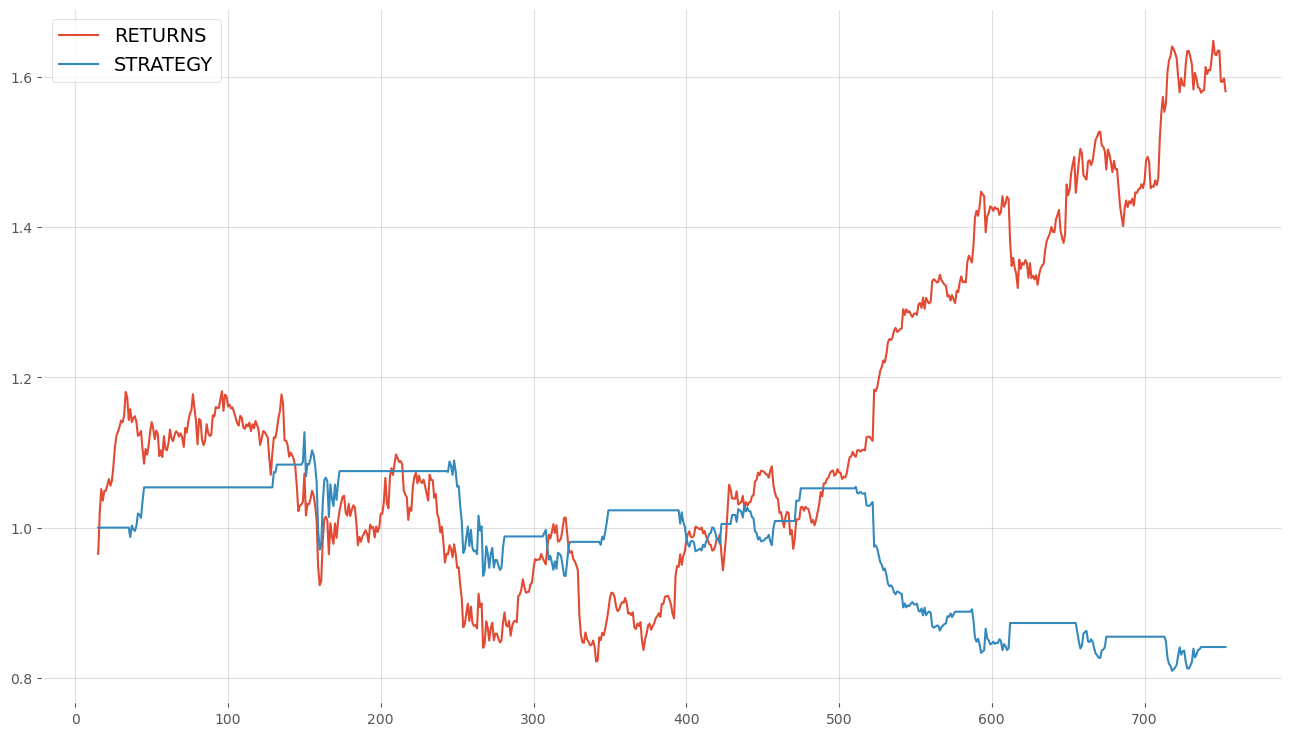

In [245]:
apple1[["RETURNS", "STRATEGY"]].dropna().cumsum().apply(np.exp).plot(figsize = [16, 9])

In [246]:
gain_df = apple1["STRATEGY"].dropna().apply(np.exp)-1
apple1["fee"] = np.where(apple1["trading_positions"].shift(1)!=0,5,0)


In [247]:
apple1 = apple1.dropna()

In [248]:
gain_df

15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
      ... 
749    0.0
750    0.0
751    0.0
752    0.0
753    0.0
Name: STRATEGY, Length: 739, dtype: float64

In [249]:
base_capital = 100000
for i in apple1.index:
    base_capital = base_capital+base_capital*gain_df.loc[i]
    apple1.loc[i,"asset_with_fee"] = base_capital
    base_capital = base_capital-apple1.loc[i,"fee"]

In [250]:
apple1

,Date,Open,High,Low,Close,Adj Close,Volume,Return,up_sign,down_sign,RSI,trading_positions,RETURNS,STRATEGY,fee,asset_with_fee
15,2015-01-27,28.105000,28.120001,27.257500,27.285000,24.456104,382274800,-0.035013,0.000000,0.035013,49.243365,0.0,-0.035641,-0.0,0,100000.000000
16,2015-01-28,29.407499,29.530001,28.827499,28.827499,25.838680,585908400,0.056533,0.056533,0.000000,60.072320,0.0,0.054993,0.0,0,100000.000000
17,2015-01-29,29.080000,29.797501,28.889999,29.725000,26.643131,337745600,0.031134,0.031134,0.000000,64.557045,0.0,0.030659,0.0,0,100000.000000
18,2015-01-30,29.600000,30.000000,29.212500,29.290001,26.253229,334982000,-0.014634,0.000000,0.014634,61.083965,0.0,-0.014742,-0.0,0,100000.000000
19,2015-02-02,29.512501,29.792500,29.020000,29.657499,26.582626,250956400,0.012547,0.012547,0.000000,62.925573,0.0,0.012469,0.0,0,100000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,2017-12-22,43.669998,43.855000,43.625000,43.752499,41.427490,65397600,0.000000,0.000000,0.000000,60.921119,0.0,0.000000,0.0,0,82785.806396
750,2017-12-26,42.700001,42.867500,42.419998,42.642502,40.376476,132742000,-0.025370,0.000000,0.025370,47.234848,0.0,-0.025697,-0.0,0,82785.806396
751,2017-12-27,42.525002,42.695000,42.427502,42.650002,40.383587,85992800,0.000176,0.000176,0.000000,47.323314,0.0,0.000176,0.0,0,82785.806396
752,2017-12-28,42.750000,42.962502,42.619999,42.770000,40.497204,65920800,0.002813,0.002813,0.000000,48.800192,0.0,0.002809,0.0,0,82785.806396


### <font color = red> Answer 2 is presented in the cell below: </font>

### <font color = blue> 👉 Question 3</font>. How much in cumulative returns could you have had as a result of the RSI strategy?

### Below are the lines of code that lead to an answer:

### <font color = red> Answer 3 </font>

    The answer is ____________ % .

### <font color = blue> 👉 Question 4</font>. Now please find the `five` worst drawdown periods over the investment horizon and provide their net drawdown in % and duration, respectively.

### <font color = green> The question asks you to find the five worst drawdown periods, beyond identifying max drawdown (MDD).

### Below are the lines of code that lead to an answer:

### <font color = red> Answer 4 </font>

    The Worst drawdown period     : Net drawdown ____________ % | Duration ____________ Days
    
    The 2nd worst drawdown period : Net drawdown ____________ % | Duration ____________ Days
     
    The 3rd worst drawdown period : Net drawdown ____________ % | Duration ____________ Days
         
    The 4th worst drawdown period : Net drawdown ____________ % | Duration ____________ Days
    
    The 5th worst drawdown period : Net drawdown ____________ % | Duration ____________ Days

### <font color = blue> 👉 Question 5</font>. Within the investment horizon, please calculate annual returns for each of the three years and then find the year that performs better than average vs. less than average annual returns.

### Below are the lines of code that lead to an answer:

### <font color = red> Answer 5 </font>

    Below average year(s) : ____________ 
    
    Above average year(s) : ____________ 
     

###  <font color = blue> 👉 Question 6. </font> What's the annualized Sharpe ratio of the current investment strategy?

### Below are the lines of code that lead to an answer:

### <font color = red> Answer 6 </font>
    
    Sharpe ratio: __________
    

## 👇 <font color = "purple"> Bigger Question 7. ### 

### This bigger question is where you will execute a principal component analysis (PCA) based portfolio for asset allocation. 
<br>
    
### Go to [the list of SP 500 companies on Wikipedia](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies).
    
    Step 1: Among the securities added to the S&P 500 component before January 2000, select the first 30 stocks. 
    
    Step 2: Your objective is to find the portfolio using PCA. Using what you learned in class, 
    identify the profile of each portfolio. 
    
    Step 3: Then backtest the performance of your portfolio, relative to the equal weight portfolio. 
    Here, as you learned in class, use 80% of your data for PCA and 20% for backtesting.
    
### <font color = "green"> NOTE: The investment horizon will be 20 years between 2000 and 2019    

### Below are the lines of code that lead to an answer:

In [36]:
"""First, let's generate 30 stocks that are listed before 2020."""

tickers = ["MMM", 
           "ABT", 
           "ADM", 
           "MO", 
           "AEP", 
           "BA", 
           "BMY", 
           "CPB", 
           "CAT", 
           "CVX", 
           "CMS", 
           "KO", 
           "CL", 
           "COP", 
           "ED", 
           "CSX", 
           "CVS", 
           "DE", 
           "DTE", 
           "ETN", 
           "EIX", 
           "ETR", 
           "EXC", 
           "IBM", 
           "F", 
           "GD", 
           "GE", 
           "GIS", 
           "HAL", 
           "HIG"]

start = dt.date(2000, 1, 1)
end = dt.date(2019, 12, 31)

stocks = pdr.get_data_yahoo(tickers, start, end)

[*********************100%%**********************]  30 of 30 completed


In [38]:
stocks = stocks["Adj Close"]
Daily_Linear_Return =\
(
    stocks
    .pct_change(1)
)

Daily_Linear_Return.head(10)

,ABT,ADM,AEP,BA,BMY,CAT,CL,CMS,COP,CPB,...,F,GD,GE,GIS,HAL,HIG,IBM,KO,MMM,MO
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,-0.028572,-0.010417,0.011928,-0.001555,-0.075655,-0.012853,-0.026104,0.012712,-0.019310,-0.036913,...,-0.033413,0.042038,-0.040000,-0.018148,0.004894,-0.033150,-0.033945,0.001109,-0.039735,0.008000
2000-01-05,-0.001838,-0.015790,0.037328,0.062305,-0.006406,0.023438,-0.034020,0.027197,-0.018284,-0.002455,...,0.003704,0.068460,-0.001736,-0.005546,-0.043832,-0.030000,0.035137,0.008859,0.028965,-0.005291
2000-01-06,0.034991,0.005347,0.005681,0.010264,0.013786,0.050890,-0.002135,-0.008147,0.034384,0.021090,...,0.001230,0.003432,0.013370,0.006372,0.040747,0.008836,-0.017242,0.001097,0.080429,-0.018617
2000-01-07,0.010676,0.015958,0.013183,0.029028,0.146444,0.032688,0.059893,0.022587,0.000000,0.018933,...,0.073710,0.026226,0.038722,0.001862,0.061990,0.046716,-0.004385,0.065790,0.019851,0.027100
2000-01-10,-0.007042,0.000000,-0.003718,-0.014105,-0.010949,-0.032825,0.027246,-0.014056,-0.002770,-0.032095,...,-0.018306,-0.008890,-0.000413,-0.020447,-0.039938,-0.016737,0.039647,-0.031893,-0.004866,0.013193
2000-01-11,-0.014185,-0.015707,0.003731,-0.018597,-0.013837,-0.015758,0.004912,0.026476,-0.001389,0.010471,...,-0.026807,-0.013452,0.001653,0.013283,0.036800,0.007092,0.008474,0.034006,-0.017115,0.005209
2000-01-12,-0.014965,0.026596,0.007435,0.004373,-0.002807,0.017241,0.006842,-0.005952,-0.019471,-0.012090,...,0.028742,-0.032141,0.003300,-0.001873,-0.067901,-0.018310,0.004201,0.011306,0.002488,0.005181
2000-01-13,-0.009174,-0.005181,-0.001845,-0.015965,-0.018762,0.010896,0.006796,0.009980,0.001418,0.017483,...,-0.011641,0.000000,0.011513,0.003752,0.013245,-0.008609,-0.010460,-0.015245,0.000000,0.010309


In [39]:
Daily_Linear_Return =\
(
    Daily_Linear_Return[Daily_Linear_Return 
                        .apply(lambda x:(x - x.mean()
                                        ).abs() < (3 * x.std()
                                                  )
                              )
                        .all(1)
    ]
)
#all()，它会遍历这个对象中的所有元素，如果所有元素都为真（非零、非空、非空字符串等），则返回 True，否则返回 False

In [50]:
from sklearn.preprocessing import StandardScaler
scaler =\
(
    StandardScaler()
    .fit(Daily_Linear_Return)
)

In [51]:
scaled_sp =\
(
    pd
    .DataFrame(scaler.fit_transform(Daily_Linear_Return),
               columns = Daily_Linear_Return.columns,
               index = Daily_Linear_Return.index)
)


In [52]:
scaled_sp.head()

,ABT,ADM,AEP,BA,BMY,CAT,CL,CMS,COP,CPB,...,F,GD,GE,GIS,HAL,HIG,IBM,KO,MMM,MO
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-11,-1.290430,-1.126131,0.285732,-1.323953,-1.114700,-1.058894,0.459671,2.096202,-0.150724,0.931516,...,-1.417257,-1.159998,0.105768,1.353575,1.760081,0.375942,0.682970,3.591797,-1.652283,0.383638
2000-01-12,-1.358512,1.747404,0.636949,0.217456,-0.270885,1.048636,0.658751,-0.557825,-1.349967,-1.173498,...,1.509285,-2.675883,0.223977,-0.277328,-3.358020,-1.049314,0.312614,1.157166,0.167955,0.381112
2000-01-13,-0.853411,-0.411138,-0.243123,-1.147335,-1.491424,0.643408,0.653925,0.746092,0.035498,1.585709,...,-0.618268,-0.068953,0.813240,0.327990,0.608641,-0.505001,-0.958154,-1.690303,-0.063055,0.848164
2000-01-14,1.885010,2.771034,-0.068146,2.497323,2.064832,-0.358421,-2.433090,-1.202890,-0.622245,-2.770819,...,-1.308132,0.504966,-1.296161,-2.489511,0.360538,0.627618,0.956280,0.830097,-1.387986,-1.020192
2000-02-03,0.441354,-0.059195,3.104872,-1.861705,0.607775,-1.706573,-2.254001,2.083079,-1.298297,1.573637,...,0.130445,-2.203415,2.763484,1.710263,0.290357,1.662194,2.716644,-2.195558,-0.878644,1.565284


In [53]:
#分训练集和测试集
prop =\
    int(len(scaled_sp) * 0.80)

X_Train = scaled_sp[    : prop] # First 80% of the data
X_Test  = scaled_sp[prop:     ] # Remaining 20% of the data

X_Train_Raw = Daily_Linear_Return[    :prop]
X_Test_Raw  = Daily_Linear_Return[prop:    ]

In [55]:
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

from sklearn.decomposition import TruncatedSVD

from numpy.linalg import inv, eig, svd

from sklearn.manifold import TSNE

In [56]:
pca = PCA()

PrincipalComponent = pca.fit(X_Train)

In [57]:
NumEigenValues = 10

<Axes: title={'center': 'Cumulative Explained Variance by Each PC'}>

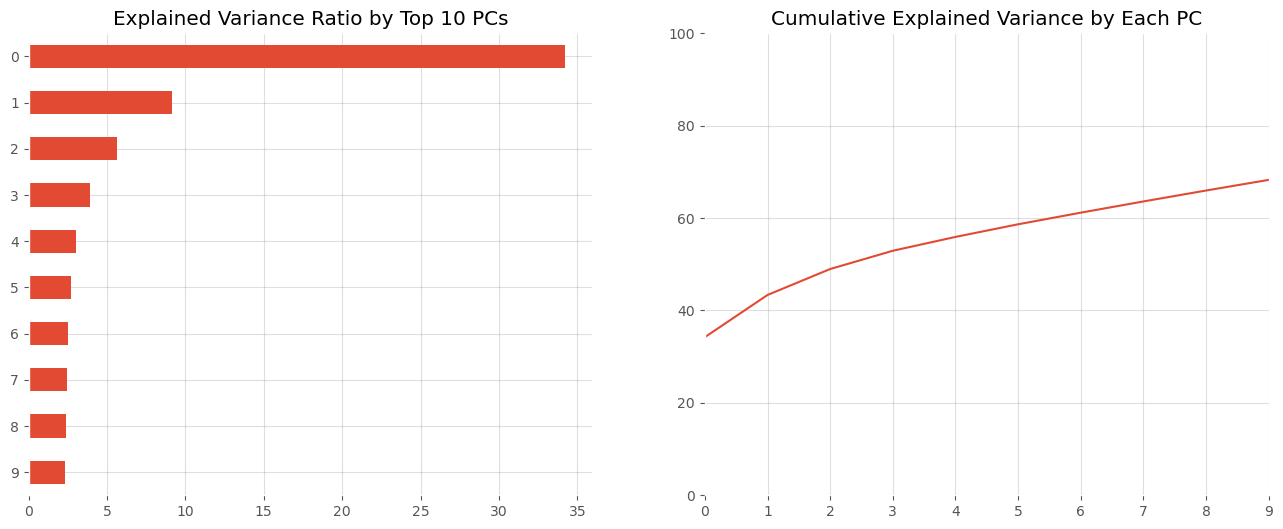

In [58]:
fig, axes =\
(
    plt
    .subplots(ncols = 2,
              figsize = [16, 6]
             )
)

# Plot on the left panel

Series1 =\
(
    pd
    .Series(pca
            .explained_variance_ratio_[ :NumEigenValues]  #sigle variance
           )
    .sort_values()
    * 100
)

# Plot on the right panel

Series2 =\
(
    pd
    .Series(pca
            .explained_variance_ratio_[ :NumEigenValues] #cumulated variance
           )
    .cumsum()
    * 100
)

(
    Series1
    .plot
    .barh(ylim = (0, 9),
          title = "Explained Variance Ratio by Top 10 PCs",
          ax = axes[0]
         )
)

(
    Series2
    .plot(ylim = (0, 100),
          xlim = (0, 9),
          title = "Cumulative Explained Variance by Each PC",
          ax = axes[1]
         )
)

In [59]:
(
    pd
    .Series(np
           .cumsum(pca
                   .explained_variance_ratio_)
           )
    .to_frame("Explained Variance")
    .head(NumEigenValues)
    .style
    .format("{:,.2%}".format)
)#这个表应该是累积

,Explained Variance
0,34.24%
1,43.36%
2,48.98%
3,52.93%
4,55.92%
5,58.66%
6,61.17%
7,63.60%
8,65.96%
9,68.27%


In [60]:
def PCWeights():

    weights = pd.DataFrame()

    for i in range(len(pca.components_)
                  ):
        weights["weights_{}".format(i)] = pca.components_[i] / sum(pca.components_[i]
                                                                  )

    weights = weights.values.T
    return weights

In [61]:
weights = PCWeights()

In [64]:
stocks =\
(
    stocks
    .fillna(method = "ffill")
)

stocks =\
(
    stocks
    .dropna(axis = 0)
)

stocks.shape

(5030, 30)

In [65]:
NumComponents = 5

# Extract the top principal components from the PCA object
# and create a DataFrame with columns named after the original features

topPortfolios =\
(
    pd
    .DataFrame(pca.components_[ : NumComponents],
               columns = stocks.columns)
)

# Normalize the weights of the top portfolios such that the weights sum up to 1 for each portfolio
# This is done by dividing each weight by the sum of weights for the respective portfolio

eigen_portfolios =\
(
    topPortfolios
    .div(topPortfolios.sum(1),
         axis = 0)
)

# Rename the index of the eigen_portfolios DataFrame for better readability

eigen_portfolios.index = [f"Portfolio {i}" for i in range(NumComponents)
                         ]

# Calculate the square root of the explained variance for each component
# This provides the standard deviation of returns for each eigenportfolio

np.sqrt(pca.explained_variance_)

array([3.278, 1.692, 1.327, 1.113, 0.97 , 0.926, 0.888, 0.873, 0.861,
       0.851, 0.834, 0.825, 0.811, 0.796, 0.786, 0.777, 0.771, 0.754,
       0.729, 0.713, 0.694, 0.689, 0.68 , 0.66 , 0.633, 0.61 , 0.604,
       0.58 , 0.549, 0.486])

In [66]:
eigen_portfolios

,ABT,ADM,AEP,BA,BMY,CAT,CL,CMS,COP,CPB,...,F,GD,GE,GIS,HAL,HIG,IBM,KO,MMM,MO
Portfolio 0,0.028797,0.030995,0.036854,0.033502,0.028220,0.038776,0.030313,0.034090,0.032824,0.029077,...,0.030264,0.035231,0.036295,0.028191,0.029895,0.036519,0.033386,0.032920,0.040113,0.027280
Portfolio 1,-0.249304,-0.798059,3.789304,-1.593414,-0.597657,-2.218296,-0.053170,3.007962,-1.174502,0.547258,...,-2.085767,-1.360050,-1.592439,0.511909,-1.399412,-1.630449,-1.446251,0.197028,-1.765836,0.580788
Portfolio 2,0.943044,0.121730,-0.203509,0.236722,0.748377,-0.596408,1.013664,-0.284194,-1.085218,0.890829,...,-0.031329,0.154196,0.181708,0.888356,-1.263863,0.064182,0.191304,0.905607,0.155688,0.811061
Portfolio 3,0.302118,0.956593,-0.433778,-0.839564,0.204262,-0.521372,0.782224,-0.490967,1.723433,0.600915,...,-1.302804,-0.725576,-0.561669,0.938878,1.451561,-0.954483,-0.295042,0.956599,-0.296651,0.865262
Portfolio 4,4.411635,-2.057195,0.324202,1.162114,4.804633,-2.039318,-2.141759,0.565244,1.265367,-1.386758,...,-0.289995,1.391925,0.132581,-1.832572,1.098771,0.201010,0.537416,-2.205885,-0.372990,-0.627174


array([[<Axes: title={'center': 'Portfolio 0'}>],
       [<Axes: title={'center': 'Portfolio 1'}>],
       [<Axes: title={'center': 'Portfolio 2'}>],
       [<Axes: title={'center': 'Portfolio 3'}>],
       [<Axes: title={'center': 'Portfolio 4'}>]], dtype=object)

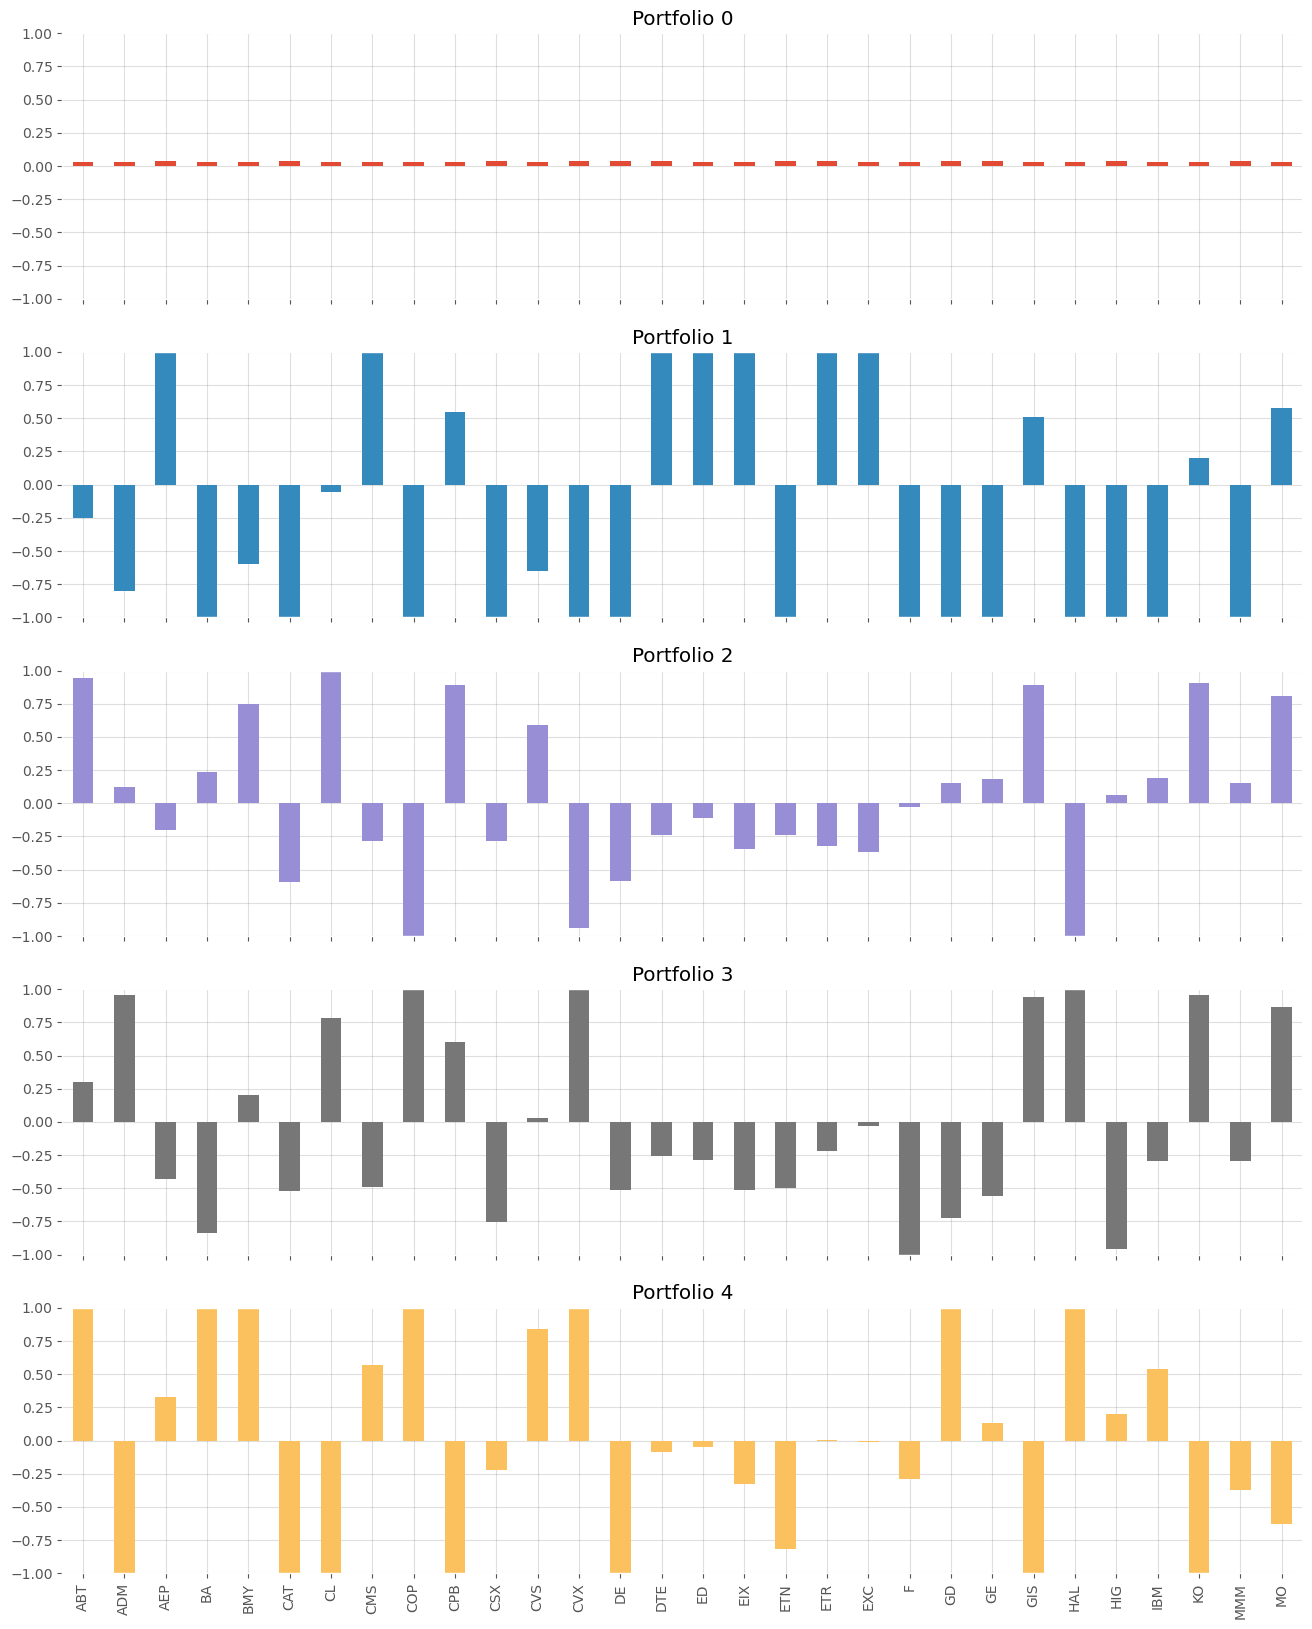

In [67]:
(
    eigen_portfolios
    .T  # Transpose the DataFrame to have portfolios as columns and assets as rows
    .plot
    .bar(subplots = True,
         layout = (int(NumComponents), 1),
         legend = False,
         sharey = True,
         figsize = [16, 20],
         ylim = [-1, 1]
        )
)

### <font color = red> Answer 7 is presented in the cell below: </font>

<Axes: >

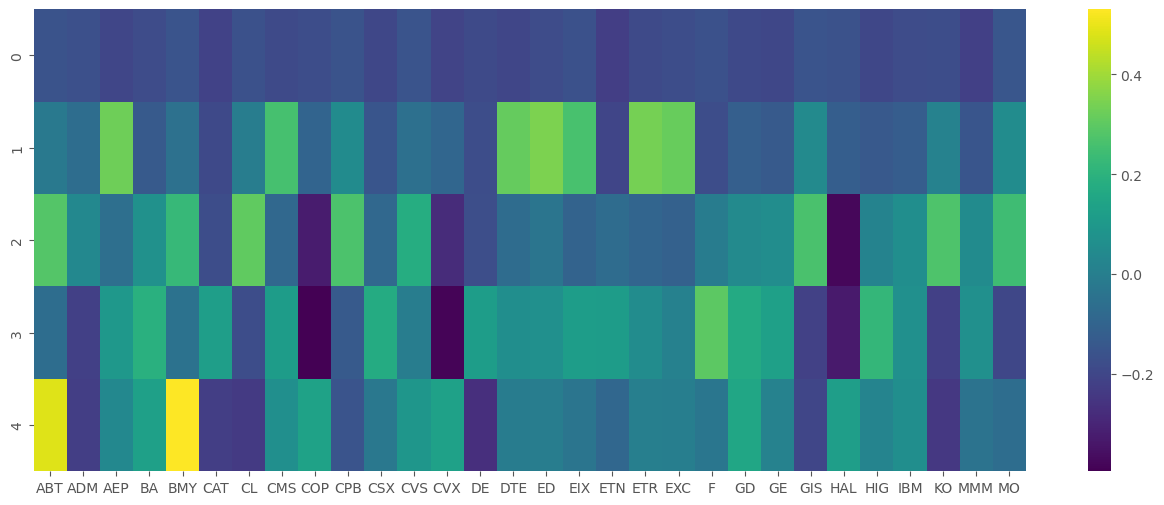

In [68]:
plt.figure(figsize = [16, 6]
          )

sns.heatmap(topPortfolios,
            cmap = "viridis")

In [69]:
def calculate_sharpe_ratio(ts_returns, periods_per_year = 252):

    n_years = ts_returns.shape[0] / periods_per_year

    annualized_return = np.power(np.prod(1 + ts_returns), (1 / n_years)
                                ) - 1

    annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)

    annualized_sharpe = annualized_return / annualized_vol

    return annualized_return, annualized_vol, annualized_sharpe

In [96]:
def recommend_optimal_portfolio():

    # Number of eigenportfolios or principal components
    
    n_portfolios = len(pca.components_)

    # Initialize arrays for annualized return, volatility, and Sharpe ratio of each eigenportfolio
    
    annualized_ret = np.array([0.] * n_portfolios)

    sharpe_metric = np.array([0.] * n_portfolios)

    annualized_vol = np.array([0.] * n_portfolios)

    # Variable to track the index of the eigenportfolio with the highest Sharpe ratio
    
    highest_sharpe = 0

    # Extract stock tickers from the scaled data
    
    stock_tickers =\
    (scaled_sp
     .columns 
     .values)

    n_tickers = len(stock_tickers)

    # Extract principal components
    
    PCs = pca.components_

    # Loop through each eigenportfolio

    for i in range(n_portfolios):

        # Normalize the weights of the i-th eigenportfolio
        
        pc_w = PCs[i] / sum(PCs[i])

        # Create a DataFrame for the eigenportfolio weights
        
        eigen_prtfi =\
            (
                pd
                .DataFrame(data = {"weights": pc_w.squeeze() * 100},
                           index = stock_tickers)
            )

        # Calculate returns for the eigenportfolio
        
        eigen_prtfi.sort_values(by = ["weights"],
                                ascending = False,
                                inplace = True)

        eigen_prti_returns =\
            (
                np
                .dot(X_Train_Raw.loc[ : , eigen_prtfi.index],
                     pc_w)
            )

        eigen_prti_returns =\
            (
                pd
                .Series(eigen_prti_returns.squeeze(),
                        index = X_Train_Raw.index)
            )

        # Calculate annualized return, volatility, and Sharpe ratio for the eigenportfolio
        
        er, vol, sharpe = calculate_sharpe_ratio(eigen_prti_returns)

        # Store the metrics in their respective arrays
        
        annualized_ret[i] = er
        annualized_vol[i] = vol
        sharpe_metric[i] = sharpe

        # Replace NaN values in Sharpe metric array with zeros
        
        sharpe_metric = np.nan_to_num(sharpe_metric)

    # Let's find a portfolio with the HIGHEST Sharpe Ratio

    highest_sharpe = np.argmax(sharpe_metric)

    # Print the details of the eigenportfolio with the highest Sharpe ratio
    

    # Create a DataFrame to store the results for all eigenportfolios
    
    results =\
        (
            pd
            .DataFrame(data = {"Return": annualized_ret,
                               "Vol": annualized_vol,
                               "Sharpe": sharpe_metric}
                      )
        )
    results.replace([np.inf, -np.inf], np.nan, inplace=True)
    results.dropna(inplace = True)

    results.sort_values(by = ["Sharpe"],
                        ascending = False,
                        inplace = True)

    # Print the top 10 eigenportfolios based on Sharpe ratio

    print(results.head(10)
         )

In [97]:
recommend_optimal_portfolio()

      Return        Vol    Sharpe
0   0.174755   0.123382  1.416382
8   0.343480   0.768824  0.446761
5  -1.000000  16.465632 -0.060733
15 -0.098731   1.375784 -0.071763
27 -1.000000   9.640212 -0.103732
9  -1.000000   7.448271 -0.134259
22 -0.238015   1.639932 -0.145137
18 -0.209395   1.059166 -0.197698
1  -0.452800   2.091362 -0.216510
16 -0.408412   1.478441 -0.276245


In [98]:
def backtest_PCA_porfolios(eigen):

    eigen_prtfi =\
        (
            pd
            .DataFrame(data = {"weights": eigen.squeeze()
                              },
                       index = stock_tickers)
        )

    eigen_prtfi.sort_values(by = ["weights"],
                            ascending = False,
                            inplace = True)

    eigen_prtfi_returns =\
    (
        np
        .dot(X_Test_Raw
             .loc[ : , eigen_prtfi.index],
             eigen)
    )

    eigen_portfolio_returns =\
    (
        pd
        .Series(eigen_prtfi_returns.squeeze(),
                index = X_Test_Raw.index)
    )

    returns, vol, sharpe = calculate_sharpe_ratio(eigen_portfolio_returns)

    print("Our PCA-based Portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f"  %
          (returns * 100, vol * 100, sharpe)
         )

    # Compared with what? Equal-weightage Portfolio

    equal_weight_return =\
    (
        X_Test_Raw * (1 / len(pca.components_)
                     )
    ).sum(axis = 1)

    df_plot =\
        (
            pd
            .DataFrame({"ML Portfolio Return": eigen_portfolio_returns,
                        "Equal Weight Index": equal_weight_return},
                      index = X_Test.index
                      )
        )

    (
        np
        .cumprod(df_plot + 1)
        .plot(title = "Returns of the equal weighted index vs. Eigen-Portfolio",
              figsize = [16, 8]
             )
    )

    plt.show()

In [99]:
weights

array([[ 2.880e-02,  3.100e-02,  3.685e-02,  3.350e-02,  2.822e-02,
         3.878e-02,  3.031e-02,  3.409e-02,  3.282e-02,  2.908e-02,
         3.634e-02,  2.805e-02,  3.814e-02,  3.461e-02,  3.693e-02,
         3.334e-02,  3.018e-02,  4.133e-02,  3.444e-02,  3.309e-02,
         3.026e-02,  3.523e-02,  3.630e-02,  2.819e-02,  2.990e-02,
         3.652e-02,  3.339e-02,  3.292e-02,  4.011e-02,  2.728e-02],
       [-2.493e-01, -7.981e-01,  3.789e+00, -1.593e+00, -5.977e-01,
        -2.218e+00, -5.317e-02,  3.008e+00, -1.175e+00,  5.473e-01,
        -1.731e+00, -6.498e-01, -1.072e+00, -2.101e+00,  3.640e+00,
         4.028e+00,  3.034e+00, -2.374e+00,  3.908e+00,  3.647e+00,
        -2.086e+00, -1.360e+00, -1.592e+00,  5.119e-01, -1.399e+00,
        -1.630e+00, -1.446e+00,  1.970e-01, -1.766e+00,  5.808e-01],
       [ 9.430e-01,  1.217e-01, -2.035e-01,  2.367e-01,  7.484e-01,
        -5.964e-01,  1.014e+00, -2.842e-01, -1.085e+00,  8.908e-01,
        -2.831e-01,  5.919e-01, -9.411e-01, -5

Our PCA-based Portfolio:
Return = 109.39%
Volatility = 76.72%
Sharpe = 1.43


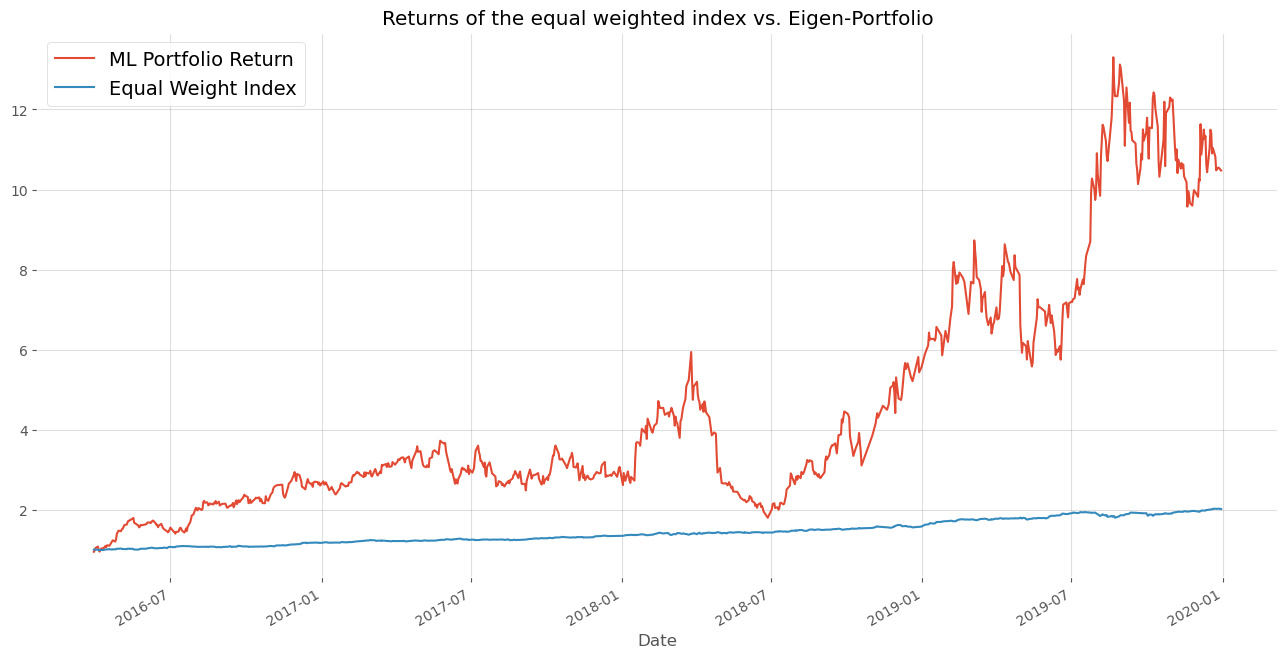

In [103]:
backtest_PCA_porfolios(eigen = weights[8]
                      )

> 💯 “Thank you for putting your efforts into the individual assessment questions” 😊